### Data Science Workflow Assignment

The objective of this notebook is to provide a high level overview of an exemplar data science workflow using actual data.

Instructions:

Read and step through the noteook and answer the question at the end of the noteboo.

References:  
Joe Blitztein, CS 109 Data Science     
https://github.com/cs109/2015

Development Workflows for Data Scientists     
https://resources.github.com/downloads/development-workflows-data-scientists.pdf

Top Ranked English Movies Of This Decade     
https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade/data#IMDB.csv

Aakash Tandel, A Data Science Workflow   
https://towardsdatascience.com/a-data-science-workflow-26c3f05a010e



### Introduction

There is no specific step-by-step process for solving all data science problems. The process needs to be adjusted with every new problem and dataset. We do however see similar procedural steps in most projects. 

For the purposes of this overview, we will following the Data Science Workflow from Joe Blitztein, CS 109 Data Science.

<img src="data_science_workflow.png" width="400px"/>

Source: Joe Blitztein, CS 109 Data Science.

### Data Science Workflow

1.	Ask an interesting question 
2.	Get the data 
3.	Explore (and clean the data)
5.	Model the data 
6.	Communicate and visualize the results 
8.  Conclusion
9.  Resources


### 1) Ask an interesting question 

What is the scientific goal? How can we use the data? What do we want to predict or estimate?

For this exercise, we are going to analyze the highest ranked movies on IMDB.com. 

The question: Can we predict IMDB movie ratings based on features like budget, runtime, and votes on the website?


### 2) Get the Data

How was the data sampled? What data is relevant? Are there any privacy issues?

Data can come from a variety of sources. CSV (comma separated value) text files, running SQL queries on a database, or various sources on the Internet. 

It is common to use the Python library, `Pandas`, to import data. Pandas represents the data in a tabular data structure called a dataframe.

Once the data is in a dataframe, we can more easily clean, analyze and model the data.

We will be using a Kaggle dataset titled "Top Ranked English Movies of this Decade." The data is available in a CSV file. 

https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade/data

https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade/download/SD2LNx0Z2MES3z3L53qQ%2Fversions%2FPSiePnuWqTJZrCan4Qua%2Ffiles%2FIMDB.csv?datasetVersionNumber=1

In [30]:
import pandas as pd 
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/top-ranked-enlglish-movies-of-this-decade/IMDB.csv', index_col=0, encoding='latin-1')

### 3) Explore (and clean) the data

- Examine and clean the data     

- Plot the data

- Analyze the data

Now that the data is in a Pandas dataframe, we can determine its size and inspect the first few rows of data.

In [31]:
df.shape

(118, 54)

The shape attribute tells us there are 119 rows and 54 columns or attributes. Which is a very small dataset, but useful for this exercise.

In [32]:
df.head()

,Title,Rating,TotalVotes,Genre1,Genre2,Genre3,MetaCritic,Budget,Runtime,ï..CVotes10,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.1,"496,092",Biography,Drama,History,96.0,"$20,000,000",134 min,75556,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
2,127 Hours (2010),7.6,"297,075",Adventure,Biography,Drama,82.0,"$18,000,000",94 min,28939,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
3,50/50 (2011),7.7,"283,935",Comedy,Drama,Romance,72.0,"$8,000,000",100 min,28304,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
4,About Time (2013),7.8,"225,412",Comedy,Drama,Fantasy,NaN,"$12,000,000",123 min,38556,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
5,Amour (2012),7.9,"76,121",Drama,Romance,NaN,94.0,"$8,900,000",127 min,11093,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8


The target variable we are trying to predict is in the `Rating` column. 

The features or input variables we are going to use are: `MetaCritic`, `Budget`, `Runtime`, `VotesUS`, `VotesnUS`, and `TotalVotes`. We will remove all of the other columns from our analysis.

*Note: There are several methods we will learn later in the course for selecting the most relevant features for building a production model.*

The code below creates a new dataframe with a subset of the columns we need and lists the first 10 rows.

In [33]:
df = df[['Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]
df.head(10)

,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.1,"496,092",96.0,"$20,000,000",134 min,8.3,8.0
2,127 Hours (2010),7.6,"297,075",82.0,"$18,000,000",94 min,7.7,7.6
3,50/50 (2011),7.7,"283,935",72.0,"$8,000,000",100 min,7.9,7.6
4,About Time (2013),7.8,"225,412",NaN,"$12,000,000",123 min,7.8,7.7
5,Amour (2012),7.9,"76,121",94.0,"$8,900,000",127 min,7.9,7.8
6,Argo (2012),7.7,"486,840",86.0,"$44,500,000",120 min,8.0,7.6
7,Arrival (2016),8.0,"370,842",81.0,"$47,000,000",116 min,8.0,7.9
8,Beasts of No Nation (2015),7.8,"51,781",79.0,"$6,000,000",137 min,7.9,7.7
9,Before Midnight (2013),7.9,"106,553",94.0,"$3,000,000",109 min,8.0,7.9
10,Big Hero 6 (2014),7.8,"315,485",74.0,"Opening Weekend: 56,215,889 ...",NaN,7.9,7.7


Missing and null values are a common problem. For example, the `NaN` value in the `MetaCritic` column.


In [34]:
df.isnull()

,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False
5,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
114,False,False,False,False,False,False,False,False
115,False,False,False,False,False,True,False,False
116,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False


We may not have captures all of the missing values with this summary.

We can sum the missing values per column as follows.

In [35]:
df.isnull().sum()

Title          0
Rating         0
TotalVotes     0
MetaCritic     7
Budget         0
Runtime       21
VotesUS        0
VotesnUS       1
dtype: int64

Here we can see missing values for `Runtime` and `VotesnUS.`

Strategies for correcting missing values include removing those rows or *imputing* some value. Missing data imputation invovles replacing missing or null values using some strategy. Strategies include the most frequently occuring value, the mean, etc.

For now, we will just drop these rows.

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

Title         0
Rating        0
TotalVotes    0
MetaCritic    0
Budget        0
Runtime       0
VotesUS       0
VotesnUS      0
dtype: int64

Tada!

Another important check in the dataset are the data types. 

In [38]:
df.dtypes

Title          object
Rating        float64
TotalVotes     object
MetaCritic    float64
Budget         object
Runtime        object
VotesUS        object
VotesnUS       object
dtype: object

Notice how `TotalVotes` , `Budget`,  `Runtime`, `VotesUS`, and `VotesnUS` are of type *object*. This is due to these fields including non-numeric characters like ',' and '$.' 

We need to convert these to numeric values.

In [39]:
df.TotalVotes = df.TotalVotes.str.replace(',', '')
df.TotalVotes = df.TotalVotes.astype(int)
df.TotalVotes.dtype

dtype('int32')

For some rows, `Budget` also contains some embedded text. We will just remove these rows. Another option could use regular expressions to try to extract the actual value. 

In [40]:
df = df[(df.Budget.str.contains("Opening") == False) & 
        (df.Budget.str.contains("Pathé") == False) &
        (df.Budget.str.contains("Production") == False)]
df.Budget = df.Budget.str.replace('[^\x00-\x7F]','')
df.Budget = df.Budget.str.replace(',', '')
df.Budget = df.Budget.str.replace('$', '')
df.Budget = df.Budget.astype(int)
df.Budget.dtype 

dtype('int32')

For `Runtime` we will use a regular expression to extract the numeric value for that column.

In [41]:
df.Runtime = df.Runtime.str.extract('(\d+)', expand=False)
df.Runtime = df.Runtime.astype(int)
df.Runtime.dtype

dtype('int32')

Finally, we need to convert `VotesnUS` and `VotesUS.`

In [42]:
df.VotesnUS = df.VotesnUS.astype(float)
print( df.VotesnUS.dtype )
df.VotesUS = df.VotesUS.astype(float)
print( df.VotesUS.dtype )

float64
float64


Our dataset is now ready for further exploratory data analysis. A good start is always to review the data.

In [43]:
df.head(20)

,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.1,496092,96.0,20000000,134,8.3,8.0
2,127 Hours (2010),7.6,297075,82.0,18000000,94,7.7,7.6
3,50/50 (2011),7.7,283935,72.0,8000000,100,7.9,7.6
5,Amour (2012),7.9,76121,94.0,8900000,127,7.9,7.8
6,Argo (2012),7.7,486840,86.0,44500000,120,8.0,7.6
7,Arrival (2016),8.0,370842,81.0,47000000,116,8.0,7.9
8,Beasts of No Nation (2015),7.8,51781,79.0,6000000,137,7.9,7.7
9,Before Midnight (2013),7.9,106553,94.0,3000000,109,8.0,7.9
11,Birdman or (The Unexpected Virtue of Ignorance...,7.8,448725,88.0,18000000,119,7.9,7.7
12,Black Swan (2010),8.0,587893,79.0,13000000,108,8.0,8.0


We can also gett a quick look at the distribution of the data with the `describe()` method.

In [44]:
df.describe()

,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
count,92.000000,9.200000e+01,92.000000,9.200000e+01,92.000000,92.000000,92.00000
mean,7.902174,4.181309e+05,78.347826,7.345543e+07,126.239130,7.980435,7.81087
std,0.248944,2.666065e+05,9.275319,7.293477e+07,19.582662,0.231687,0.26289
min,7.500000,4.077700e+04,62.000000,3.000000e+06,91.000000,7.400000,7.40000
25%,7.700000,2.615092e+05,71.750000,1.500000e+07,111.500000,7.800000,7.60000
50%,7.900000,3.516920e+05,78.000000,3.900000e+07,125.500000,8.000000,7.80000
75%,8.100000,5.403022e+05,84.000000,1.387500e+08,138.250000,8.100000,8.00000
max,8.800000,1.609713e+06,100.000000,2.500000e+08,180.000000,8.700000,8.80000


Just looking numbers or statistical summaries can be dificult to comprehend.

Plotting allows us to visually inspect and gain better insights into our data. There are many options includimg histograms, scatter plots, correlation plots, box plots, etc. The best options will depend on our data and the problem we are trying to solve.

`Matplotlib` and `Pandas` (which embeds Matplotlib in its functionality) provide handy plotig tools. 

Throughout this analysis process, we may discover outlier or other irregularities in our data that we may need to be cleaned. Real world data tends to be pretty messy.

For this example, below Pandas to create a scatter matrix. 

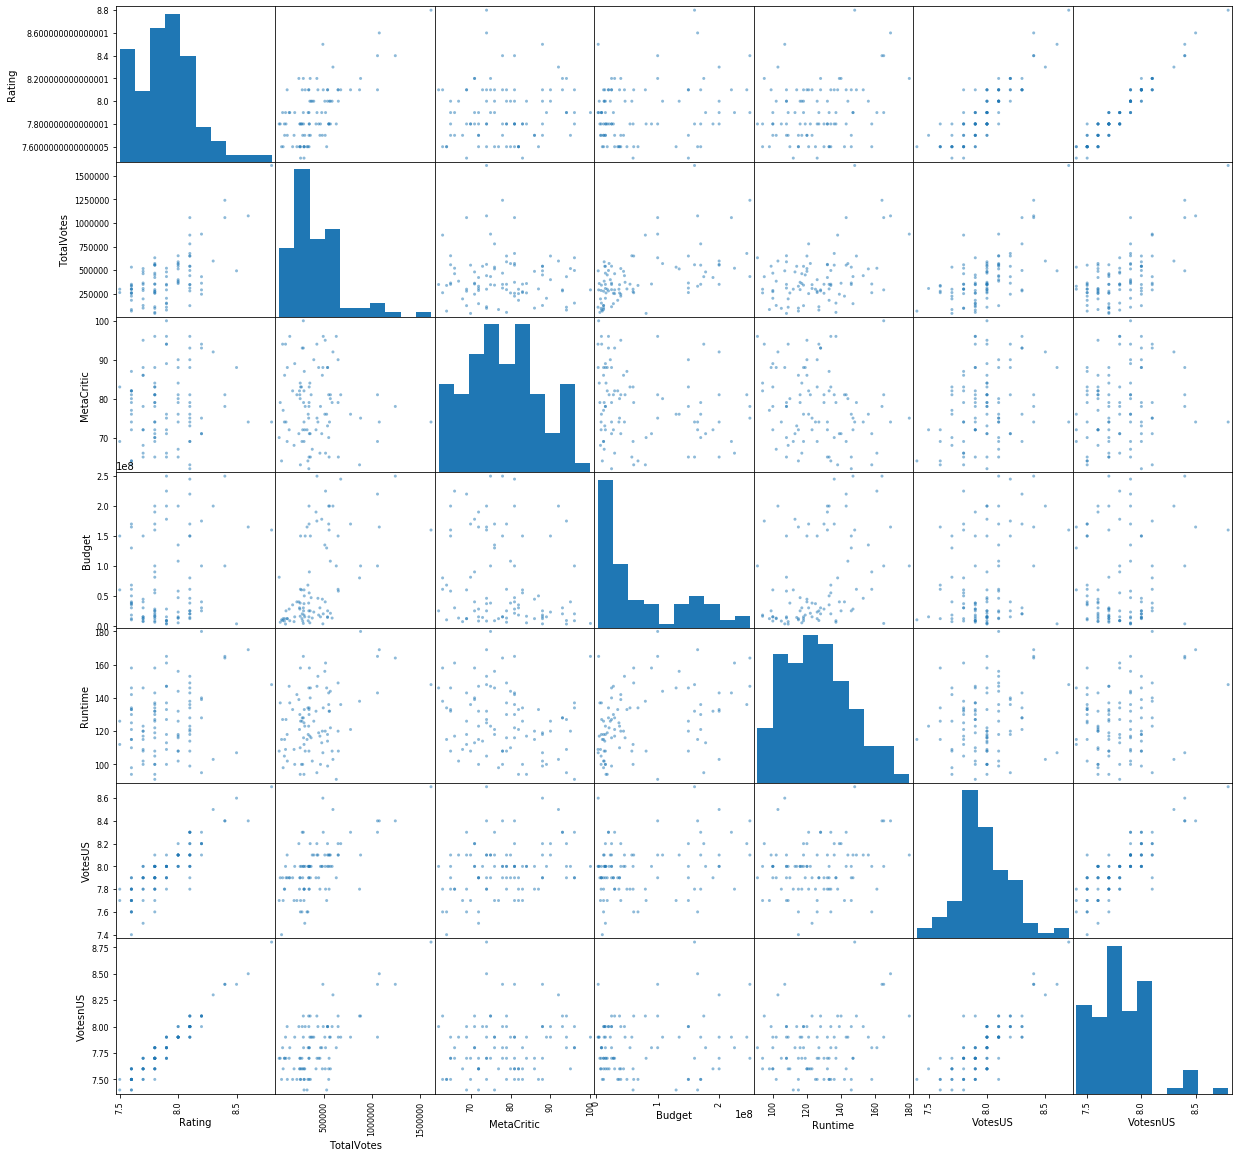

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show();

From the above plot, we're most intresting in looking for patterns or correlation between the target or dependent variable `Rating` and the other indepdent variables.

Another important step that may be necessary is *feature engineering* which involves transforming exising features or creating new features. We will skip feature engineering for now and revisit this later in the course.


### Model the data

The type of model we use will depend on our type of problem. 

If our data has a value that we are trying to predict, this is a *supervised learning problem*. If the value we are predicting is a label or category, we call this a classification problem. If we are trying to predict a number, like `Rating` (our case), we call this a regression problem.

Another important category or problems are *unsupervised*. In this case, we either do not have a value we are trying to predict or we are just trying to better understand the association between variable in our data.

For our example, we are going to be using regression (supervised learning) to predict the IMDB `Rating` from `TotalVotes`, `MetaCritic`, `Budget`, `Runtime`, `VotesUS`, and `VotesnUS.`

In general, it is a good idea to first create a *baseline* model. A baseline model is usually a simple, linear model that allows us to gain futher insight into our problem. For our example, we will use *linear regression* which is available in the *Scikit-Learn* library.

**Scikit-Learn** is a machine learning package for Python that can be used for a variety of tasks. 

When building a model, it is important to hold out some data for training, called a *train-test-split* to prevent overfitting of our model. Overfitting is when the model fits the training data too closely, and does not do a good job predicting values for examples not included in the training data. I.e., the model does not generalize well to new examples. 


First, we need to separate our feature variables `X` (a matrix) from our target variable `y` for `Scikit-Learn.`

In [46]:
y = df.Rating
X = df[['TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]

Next, we will scale values to between $0$ and $1$ using `MinMaxScaler.` Scaling values helps learning optimization algorithms like `gradient descent` converge on the appropriate model parameters.

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
Xs = MinMaxScaler().fit_transform(X)

Create the train test split.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(73, 6) (73,)
(19, 6) (19,)


We are now ready to train a baseline model where we *fit* our model to the training data. 

Then we test our model by having it *predict* `y` values for our `X_test` data. We can then *evaluate* the performance of the model by comparing the predicted values for *y* values to  the actual *y* values. 

In [51]:
from sklearn import linear_model

In [52]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Below we generate a scatter plot of Predicted versus Actual values of `y`.

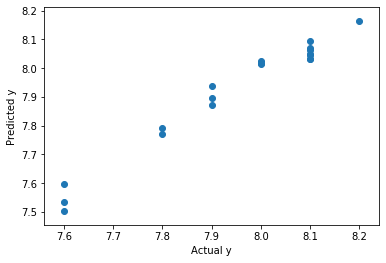

In [53]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()

And here we calculate the score using `R-squared`, which is the default metric used by `Scikit-Learn` for regression problems.

Basically, 1R-squared1, is a goodness-of-fit metric. It is the percentage of variation in our `y` variable explained by our model. A value close to 1 is good!

Other common evaluation metrics for regression include `Root Mean Squared Error` and `Adjusted R-squared`.

In [54]:
print ('Score:', model.score(X_test, y_test))  # R-squared is the default metric used by Sklearn. 

Score: 0.9439941221841385


$0.95$ $R^2$ is a very good number.

At this step, we would most likely futher explore the validity of our results, and evaluate other machine learning algorithms and explore feature engineering techniques to see of we can improve our results. 

One area of concern is collinearity. Collinearrity is when you have features that are very similar and give the same information about the target variable. For example, temperature in Celsius and Fahrenheit. The features `VotesUS` and `VotesnUS` could highly correlated. This could help explain the high $R^2$ value. We may want to consider using Adjuarted $R^2$ or other evalution metrics. A correlation plot would help explore this further. 


Beta coefficients are the parameters learned by our linear model. For linear regression, they represent the change in the targe value of a unit change for each input variable holding all other variables constant.

We see that `VotesnUS.` had the largest postive impact on our target variable.

Other Python packages like `Statsmodels` provide regression coefficients and their associated `p-values` which lets us know if these coefficient are statisticall significant.

In [55]:
lm.coef_

array([-0.09863912, -0.07844901,  0.03114588,  0.05672535,  0.37272597,
        1.04912225])

We will move on to the final step in our process.

### Communicate and visualize the results

Finally, you need to communicate your results. The beauty of using notebooks is that they provide a great way to integrate documentaion, methods, and results.

The best form of communication will depend on your problem and your target audience. For each of the following audiences, identify aspects of this study that would be most relevant:

- Data Scientist

- Software/data engineer

- Marketing manager


Answer:

Data scientist - data munging and model building; what attributes were used for prediction and why, what model was used, why the regression model was used, the output graph and R^2 value, what are the limitations of using R^2 to evaluate accuracy of the model

Software/data engineer - data collection and processing; where the data came from, what attributes were used for prediction, how null values were dealt with

Marketing manager - final result; the final Actual Y vs Predicted Y graph along with the R^2 value and an explanation of the limitations of the R^2, such as the high correlations
    